### Discliamer:
    This data was accessed on Saturday, August 5st. Updated numbers might be different

In [1]:
#dependices
import os
import csv
import pandas as pd

In [2]:
#After looking at the data with what the google case/death counts are the data that we had before is not a good representation.
#Using by-boro dataset to get case count and death count
cases = "Data Set/by-boro.csv"
case_count = pd.read_csv(cases)
case_count.head()

,BOROUGH_GROUP,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Bronx,3494.37,883.30,274.70,50044,12650,3934
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508
3,Queens,2970.68,760.41,261.57,67699,17329,5961
4,Staten Island,3078.04,507.37,188.16,14657,2416,896


In [3]:
#rename columns to work with
case = case_count.rename(columns={"BOROUGH_GROUP": "Borough", "CASE_RATE": "case_rate", "HOSPITALIZED_RATE": "hospitalized_rate",
                                 "DEATH_RATE": "death_rate", "CASE_COUNT": "case_count", "HOSPITALIZED_COUNT": "hospitalized_count",
                                 "DEATH_COUNT": "death_count"})
case
#drop citywide row
dropped = case.drop(case.index[5])
dropped

,Borough,case_rate,hospitalized_rate,death_rate,case_count,hospitalized_count,death_count
0,Bronx,3494.37,883.30,274.70,50044,12650,3934
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508
3,Queens,2970.68,760.41,261.57,67699,17329,5961
4,Staten Island,3078.04,507.37,188.16,14657,2416,896


In [4]:
# #Total Number of cases by Borough
# cases = borough_df.groupby("Borough")["Cases"].sum()
# cases_df = pd.DataFrame(data = cases)
# cases_df = cases_df.rename(columns={"Cases": "Total Cases"})
# # Total cases per 100,000 by Borough
# cases_100 = borough_df.groupby("Borough")["Cases per 100,000"].sum()
# cases_100_df = pd.DataFrame(data = cases_100)
# cases_100_df = cases_100_df.rename(columns={"Cases per 100,000": "Cases per 100,000 (total)"})
# #Total deaths per 100,000 by Borough
# death_100 = borough_df.groupby("Borough")["Deaths per 100,000"].sum()
# death_100_df = pd.DataFrame(data = death_100)
# death_100_df = death_100_df.rename(columns={"Deaths per 100,000": "Deaths per 100,000 (total)"})
# # Avgerage % positve of tested by Borough
# pos = borough_df.groupby("Borough")["% positve of tested"].mean()
# pos_df = pd.DataFrame(data = pos)
# pos_df = pos_df.rename(columns={"% positve of tested": "% positve of tested (average)"})
# pos_df_2 = pos_df.round(2)
# #merge dataframes
# merge1 = pd.merge(cases_df , cases_100_df, on = "Borough", how='outer')
# merge2 = pd.merge(merge1 , death_100_df, on = "Borough", how='outer')
# last_merge = pd.merge(merge2 , pos_df_2, on = "Borough", how='outer')

# last_merge

In [5]:
median = "Data Set/median_incomes.csv"
median_income_df = pd.read_csv(median)
#median_income_df.head()
df_filtered_year = median_income_df.loc[(median_income_df["TimeFrame"] == 2018)]
df_filtered_household = df_filtered_year.loc[(df_filtered_year["Household Type"] == "All Households")]
df_filtered_household.tail(6)
#df_filtered_household.sort_values(by=['Data'], ascending=False )
almost_done = df_filtered_household.drop(df_filtered_household.index[0:59])
#almost_done.head(6)
column = almost_done.drop(almost_done.index[5])
#column.head(10)
final = column.drop(columns=['Household Type', 'DataFormat', 'Fips'])
#final.head()
final_median = final.rename(columns={"Location": "Borough", "TimeFrame": "Year", "Data": "Average Household Income"})
final_median

,Borough,Year,Data
3439,Bronx,2018,"$38,467.00"
3440,Brooklyn,2018,"$61,220.00"
3441,Manhattan,2018,"$85,066.00"
3442,Queens,2018,"$69,320.00"
3443,Staten Island,2018,"$82,166.00"


In [6]:
#Add Lat and Lng for boroughs
lat_lng = pd.DataFrame(columns=['Borough', 'Lat', 'Lng'])
lat_lng = lat_lng.append({'Borough': 'Bronx', 'Lat': 40.8448, 'Lng': -73.8648}, ignore_index=True)
lat_lng = lat_lng.append({'Borough': 'Brooklyn', 'Lat': 40.6782, 'Lng': -73.9442}, ignore_index=True)
lat_lng = lat_lng.append({'Borough': 'Manhattan', 'Lat': 40.7831, 'Lng': -73.9712}, ignore_index=True)
lat_lng = lat_lng.append({'Borough': 'Queens', 'Lat': 40.7282, 'Lng': -73.7949}, ignore_index=True)
lat_lng = lat_lng.append({'Borough': 'Staten Island', 'Lat': 40.5795, 'Lng': -74.1502}, ignore_index=True)
print(lat_lng)

         Borough      Lat      Lng
0          Bronx  40.8448 -73.8648
1       Brooklyn  40.6782 -73.9442
2      Manhattan  40.7831 -73.9712
3         Queens  40.7282 -73.7949
4  Staten Island  40.5795 -74.1502


In [7]:
final = pd.merge(dropped, final_median, on = "Borough", how='outer')
final.head()

,Borough,case_rate,hospitalized_rate,death_rate,case_count,hospitalized_count,death_count,Year,Data
0,Bronx,3494.37,883.30,274.70,50044,12650,3934,2018,"$38,467.00"
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625,2018,"$61,220.00"
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508,2018,"$85,066.00"
3,Queens,2970.68,760.41,261.57,67699,17329,5961,2018,"$69,320.00"
4,Staten Island,3078.04,507.37,188.16,14657,2416,896,2018,"$82,166.00"


In [8]:
lat_merge = pd.merge(final, lat_lng, on = "Borough", how='outer')
lat_merge

,Borough,case_rate,hospitalized_rate,death_rate,case_count,hospitalized_count,death_count,Year,Data,Lat,Lng
0,Bronx,3494.37,883.30,274.70,50044,12650,3934,2018,"$38,467.00",40.8448,-73.8648
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625,2018,"$61,220.00",40.6782,-73.9442
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508,2018,"$85,066.00",40.7831,-73.9712
3,Queens,2970.68,760.41,261.57,67699,17329,5961,2018,"$69,320.00",40.7282,-73.7949
4,Staten Island,3078.04,507.37,188.16,14657,2416,896,2018,"$82,166.00",40.5795,-74.1502


In [9]:
#save to csv
lat_merge.to_csv("Data Set/lat_merge.csv",index=False)

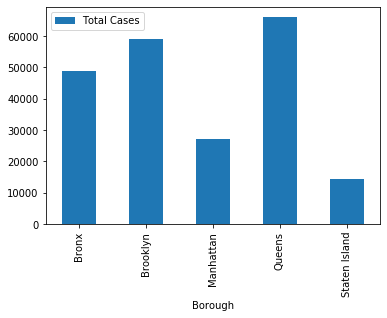

In [53]:
boro_total_bar = final.plot.bar(x = "Borough", y = "Total Cases")
boro_total_bar

NameError: name 'label' is not defined

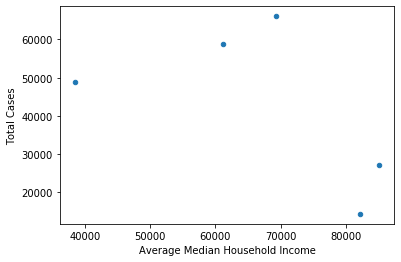

In [59]:
#boro_total_scat = final.plot.scatter(x = "Average Median Household Income", y = "Total Cases")
final.plot(kind='scatter',x='Average Median Household Income',y='Total Cases')
for x,y in zip('Average Median Household Income','Total Cases'):

    #label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,5,0.5))
plt.show()
#This is where the problem comes up